In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#Importing the dataset
from sklearn.datasets import fetch_california_housing
dataset = fetch_california_housing(as_frame=True)

In [67]:
#Description of the imported dataset
print(dataset.DESCR)
print(type(dataset))

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [69]:
#Imported DataFrame is under .frame
dataset.frame.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [71]:
#Features of the imported dataframe is under .data
dataset.data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [73]:
#Target of the imported dataframe is under .target
dataset.target.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

In [75]:
#Summary of the dataset
dataset.frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


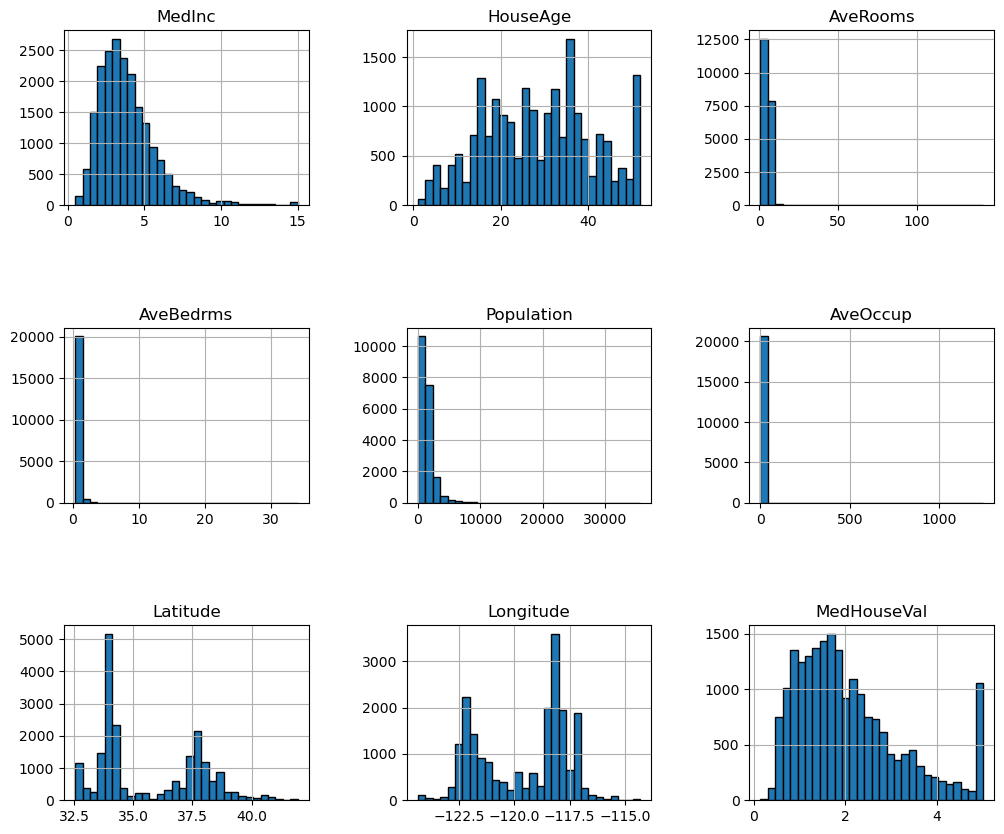

In [77]:
#Distribution of the features in the imported dataset
dataset.frame.hist(figsize=(12,10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

In [83]:
#Checking for outiers from statistics
features_of_interest = ["AveRooms","AveBedrms","AveOccup","Population"]
dataset.frame[features_of_interest].describe()
#max is very far from 75% => extreme values are present

,AveRooms,AveBedrms,AveOccup,Population
count,20640.000000,20640.000000,20640.000000,20640.000000
mean,5.429000,1.096675,3.070655,1425.476744
std,2.474173,0.473911,10.386050,1132.462122
min,0.846154,0.333333,0.692308,3.000000
25%,4.440716,1.006079,2.429741,787.000000
50%,5.229129,1.048780,2.818116,1166.000000
75%,6.052381,1.099526,3.282261,1725.000000
max,141.909091,34.066667,1243.333333,35682.000000


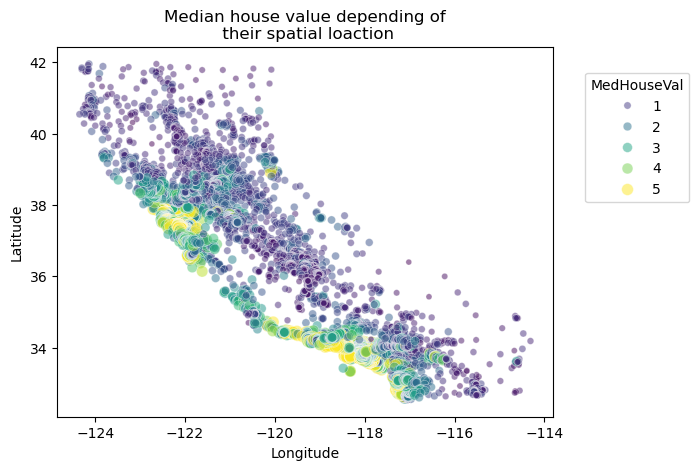

In [101]:
#Checking if area of the house (governed by Longitude and Latitude) contributes to Median house value
sns.scatterplot(
    data=dataset.frame,
    x="Longitude",
    y="Latitude",
    size="MedHouseVal",
    hue="MedHouseVal",
    palette="viridis",
    alpha=0.5)
plt.legend(title="MedHouseVal", bbox_to_anchor=(1.05,0.95), loc="upper left")
_=plt.title("Median house value depending of\n their spatial loaction")

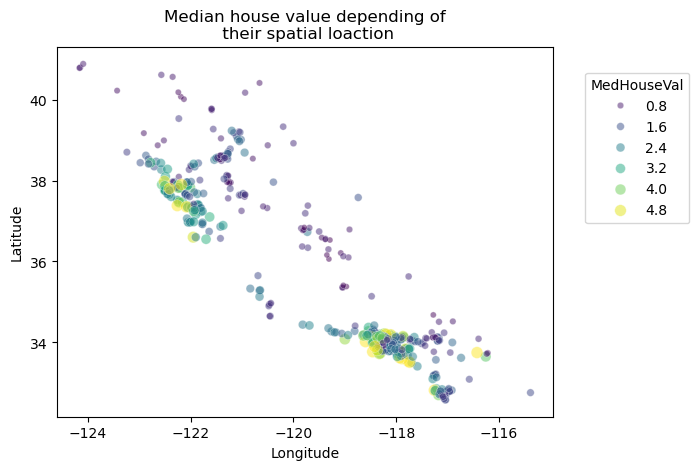

In [9]:
#Random subsampling to get lesser data points for the plot
rng = np.random.RandomState(4)
indices = rng.choice(np.arange(dataset.frame.shape[0]), size=500, replace=False)

sns.scatterplot(
    data=dataset.frame.iloc[indices],
    x="Longitude",
    y="Latitude",
    size="MedHouseVal",
    hue="MedHouseVal",
    palette="viridis",
    alpha=0.5)
plt.legend(title="MedHouseVal", bbox_to_anchor=(1.05,0.95), loc="upper left")
_=plt.title("Median house value depending of\n their spatial loaction") 

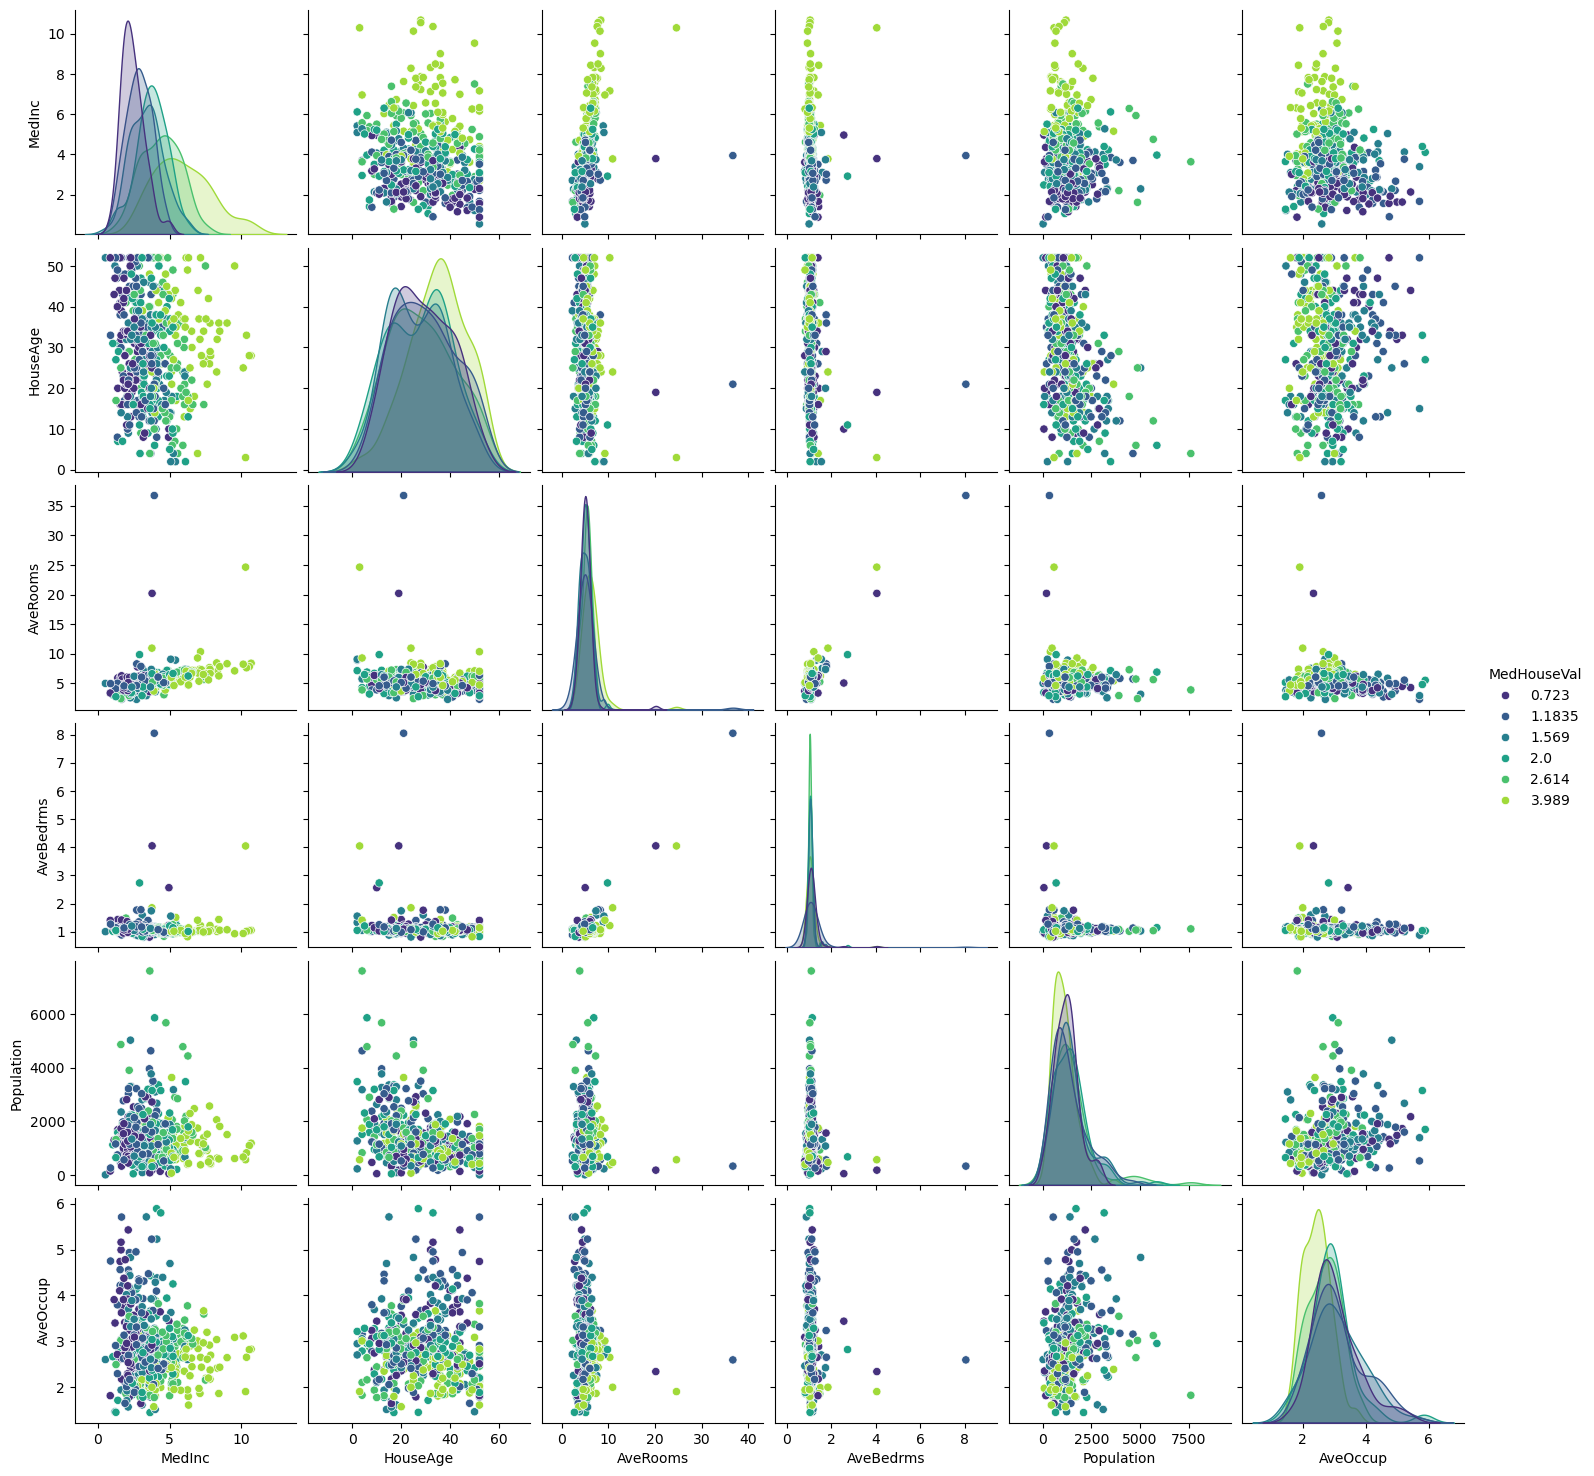

In [25]:
#Dropping unwanted columns
cols_to_drop = ["Longitude","Latitude"]
subset = dataset.frame.iloc[indices].drop(columns=cols_to_drop)

#Quantize the target and keep the midpoint for each interval
subset["MedHouseVal"] = pd.qcut(subset["MedHouseVal"],6,retbins=False)     #Split data into specifeid number of quantiles (6)
subset["MedHouseVal"] = subset["MedHouseVal"].apply(lambda x: x.mid)      #Get midpoint of the interval under which each data poiint came

sns.pairplot(data=subset, hue="MedHouseVal", palette="viridis")

In [27]:
#Creating a linear predictive model
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate

alphas = np.logspace(-3,1, num=30)
model = make_pipeline(StandardScaler(), RidgeCV(alphas=alphas))
cv_results = cross_validate(
    model,
    dataset.data,
    dataset.target,
    return_estimator=True,
    n_jobs=2)

In [35]:
#Score of the performance of the model from cross validation
score = cv_results["test_score"]
print(f"R2 score: {score.mean():.3f} +- {score.std():.3f}")

R2 score: 0.553 +- 0.062


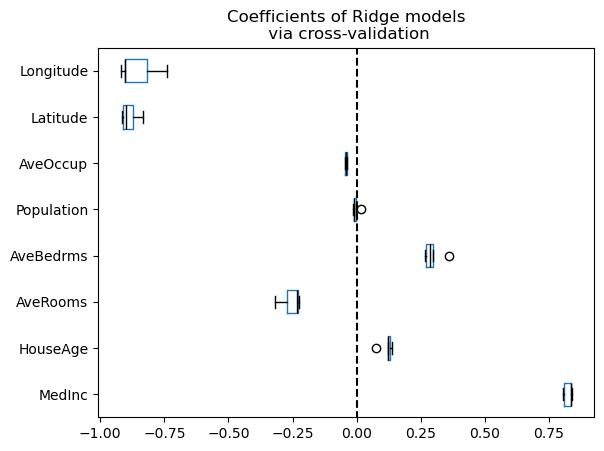

In [43]:
#Identifying the important features using coefficient of each obtained during cross validation
coefs = pd.DataFrame(
    [est[-1].coef_ for est in cv_results["estimator"]],
    columns = dataset.feature_names)
color = {"whiskers":"black", "medians":"black", "caps":"black"}
coefs.plot.box(vert=False, color=color)
plt.axvline(x=0, ymin=-1, ymax=1, color="black", linestyle="--")
_=plt.title("Coefficients of Ridge models\n via cross-validation")